In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [30]:
file_right = cv2.imread('right.jpg')
img1 = cv2.cvtColor(file_right,cv2.COLOR_BGR2GRAY)

file_left = cv2.imread('left.jpg')
img2 = cv2.cvtColor(file_left,cv2.COLOR_BGR2GRAY)

In [31]:
# 1. Compute the sift-keypoints and descriptors for both the images.

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [32]:
# 2. Compute distances between every descriptor in one image and every descriptor in the other image.

bf = cv2.BFMatcher()
# give out k best matches for each descriptor.
matches = bf.knnMatch(des1,des2, k=2)

In [33]:
# 3. Select the top matches for each descriptor of an image.

# filter out through all the matches to obtain the best ones.
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
matches = np.asarray(good)

In [34]:
# 4. Run RANSAC to estimate homography

# a homography matrix is needed to perform the transformation.
# and the homography matrix requires at least 4 matches.
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertionError("Can't find enough keypoints.")

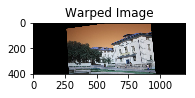

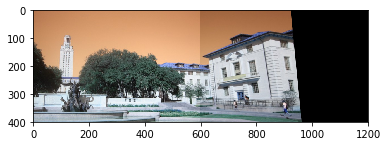

In [35]:
# 5. Now stitch them together

# a magic that combines the images together
dst = cv2.warpPerspective(file_right,H,(file_left.shape[1] + file_right.shape[1], file_left.shape[0]))

plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
plt.show()
plt.figure()

dst[0:file_left.shape[0], 0:file_left.shape[1]] = file_left
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.show()